In [8]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers

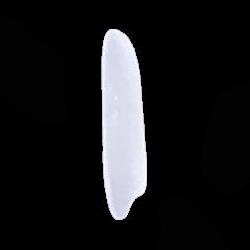

In [9]:
img=Image.open("./rice/Rice_Image_Dataset/Basmati/basmatiex.jpg")
img

In [10]:
data=tf.keras.utils.image_dataset_from_directory(
    "./rice/Rice_Image_Dataset/",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=7500
)

Found 75000 files belonging to 5 classes.


In [4]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,padding="same",input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,padding="same"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(5),
    layers.Softmax()
    
])
# cnn_model=tf.keras.Sequential([
#     layers.Conv2D(18,5,padding="same",activation="leaky_relu",input_shape=(32,32,3)),
#     layers.MaxPool2D(),
#     layers.Conv2D(18,3,padding="same",activation="leaky_relu"),
#     layers.MaxPool2D(),
#     layers.Conv2D(36,3,padding="same",activation="leaky_relu"),
#     layers.MaxPool2D(),
#     layers.Conv2D(36,3,padding="same",activation="leaky_relu"),
#     layers.MaxPool2D(),
#     layers.Flatten(),
#     layers.Dense(100,activation="relu"),
#     layers.Dense(5),
#     layers.Softmax()
    
# ])

2022-12-19 18:21:02.391950: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-19 18:21:02.400177: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-19 18:21:02.400348: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cherry-m): /proc/driver/nvidia/version does not exist
2022-12-19 18:21:02.403373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
cnn_model.build(input_shape=(1,32,32,3))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 36)         0

In [12]:
cnn_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [13]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,5)
    print(features.shape,labels.shape)
    record=cnn_model.fit(features,labels,batch_size=50,epochs=50)
    break

2022-12-19 18:23:03.692002: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 688 of 60000
2022-12-19 18:23:13.695490: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1412 of 60000
2022-12-19 18:23:23.693969: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2129 of 60000
2022-12-19 18:23:33.696302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2871 of 60000
2022-12-19 18:23:43.691569: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3593 of 60000
2022-12-19 18:23:53.709149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4323 of 60000
2022-12-19 18:24:03.690113: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling u

2022-12-19 18:32:03.711294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 39306 of 60000
2022-12-19 18:32:13.711212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 40013 of 60000
2022-12-19 18:32:23.706691: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 40714 of 60000
2022-12-19 18:32:33.690853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 41476 of 60000
2022-12-19 18:32:43.708206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 42155 of 60000
2022-12-19 18:32:53.716073: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 42828 of 60000
2022-12-19 18:33:03.699006: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Fi

(7500, 32, 32, 3) (7500, 5)
Epoch 1/50
  3/150 [..............................] - ETA: 8s - loss: 1.6200 - accuracy: 0.2867 

2022-12-19 18:38:42.845714: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24385536 exceeds 10% of free system memory.
2022-12-19 18:38:42.869310: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24385536 exceeds 10% of free system memory.
2022-12-19 18:38:42.882254: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23445504 exceeds 10% of free system memory.


150/150 [==============================] - 15s 70ms/step - loss: 0.4940 - accuracy: 0.8291
Epoch 2/50
150/150 [==============================] - 11s 70ms/step - loss: 0.1691 - accuracy: 0.9400
Epoch 3/50
150/150 [==============================] - 10s 64ms/step - loss: 0.1327 - accuracy: 0.9549
Epoch 4/50
150/150 [==============================] - 9s 59ms/step - loss: 0.1183 - accuracy: 0.9615
Epoch 5/50
150/150 [==============================] - 11s 72ms/step - loss: 0.1112 - accuracy: 0.9621
Epoch 6/50
150/150 [==============================] - 11s 72ms/step - loss: 0.0979 - accuracy: 0.9663
Epoch 7/50
150/150 [==============================] - 11s 72ms/step - loss: 0.0991 - accuracy: 0.9637
Epoch 8/50
150/150 [==============================] - 11s 72ms/step - loss: 0.0895 - accuracy: 0.9697
Epoch 9/50
150/150 [==============================] - 11s 71ms/step - loss: 0.0832 - accuracy: 0.9715
Epoch 10/50
150/150 [==============================] - 11s 72ms/step - loss: 0.0737 - accuracy

In [14]:
model=cnn_model.save("rice_pred.h5",save_format="h5")
model

In [15]:
model1=tf.keras.models.load_model("rice_pred.h5")
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 36)         0